In [1]:
import tensorflow as tf
import keras
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
from keras import layers
from tensorflow.keras.utils import image_dataset_from_directory
import os, shutil, pathlib
from PIL import Image
import json

np.random.seed(21)

2024-06-02 16:56:44.248751: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
def make_graphs(obj, title):
    epochs = len(obj.history['loss'])
    fig, axes = plt.subplots(2, 1, figsize=(10, 8))
    fig.suptitle(title, fontsize=16)  # Title for the whole figure
    make_graphs_loss(obj, epochs, axes[0])
    make_graphs_accuracy(obj, epochs, axes[1])
    plt.tight_layout()

def make_graphs_loss(obj, epochs, ax):
    # makes graph from object and epochs
    eps = [i for i in range(epochs)]
    train_acc = obj.history['loss']
    val_acc = obj.history['val_loss']
    # Now make plot
    sns.lineplot(x=eps[1:], y=train_acc[1:], color='b', label='Training Loss', ax=ax)
    sns.lineplot(x=eps[1:], y=val_acc[1:], color='r', label='Validation Loss', ax=ax)
    ax.set_xlabel('Epochs')
    ax.set_ylabel('Loss')
    ax.set_title('Training vs Validation Loss')
    ax.legend()

def make_graphs_accuracy(obj, epochs, ax):
    # makes graph from object and epochs
    eps = [i for i in range(epochs)]
    train_acc = obj.history['accuracy']
    val_acc = obj.history['val_accuracy']
    # Now make plot
    sns.lineplot(x=eps[1:], y=train_acc[1:], color='b', label='Training Accuracy', ax=ax)
    sns.lineplot(x=eps[1:], y=val_acc[1:], color='r', label='Validation Accuracy', ax=ax)
    ax.set_xlabel('Epochs')
    ax.set_ylabel('Accuracy')
    ax.set_title('Training vs Validation Accuracy')
    ax.legend()

In [3]:
train_dataset = image_dataset_from_directory(
    r'images_sorted_tvts/train',
    image_size=(255, 255),
    batch_size=32,
    labels='inferred',
    label_mode='categorical')

val_data = image_dataset_from_directory(r'images_sorted_tvts/validation',
    image_size=(255, 255),
    batch_size=32,
    labels='inferred',
    label_mode='categorical')

Found 4420 files belonging to 37 classes.


2024-06-02 16:56:57.252478: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:04:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-06-02 16:56:57.292532: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:04:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-06-02 16:56:57.292575: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:04:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-06-02 16:56:57.294454: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:04:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-06-02 16:56:57.294485: I external/local_xla/xla/stream_executor

Found 1478 files belonging to 37 classes.


In [4]:
VGG16_base  = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False)
VGG16_base.trainable = False

inputs = keras.Input(shape=(255, 255, 3))
x = inputs
x = keras.applications.vgg16.preprocess_input(x)  # scale the data
x = VGG16_base(x)
x = layers.Flatten()(x)
outputs = layers.Dense(37, activation="softmax")(x)     # only the weights in the dense layers will be trained
VGG16_Model = keras.Model(inputs, outputs)
VGG16_Model.compile(loss="categorical_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

VGG16_hist = VGG16_Model.fit(train_dataset, epochs=20, validation_data= val_data)

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 11s 0us/step
Epoch 1/20


I0000 00:00:1717347496.092147     979 service.cc:145] XLA service 0x7fec20108430 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1717347496.092182     979 service.cc:153]   StreamExecutor device (0): NVIDIA GeForce RTX 3070 Ti, Compute Capability 8.6
2024-06-02 16:58:16.119002: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-06-02 16:58:16.223002: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:465] Loaded cuDNN version 8906
I0000 00:00:1717347496.734529    1142 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_922', 544 bytes spill stores, 544 bytes spill loads

2024-06-02 16:58:21.548577: W external/local_tsl/tsl/framework/bfc_allocator.cc:296] Allocator (GPU_0_bfc) ran out of memory trying to allocate 9.16GiB with freed_by_count=0. The caller indicates that

  3/139 ━━━━━━━━━━━━━━━━━━━━ 9s 68ms/step - accuracy: 0.0243 - loss: 74.6305   

I0000 00:00:1717347502.919418     979 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


138/139 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - accuracy: 0.4415 - loss: 42.8974

I0000 00:00:1717347511.774457    1178 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_922', 512 bytes spill stores, 512 bytes spill loads



139/139 ━━━━━━━━━━━━━━━━━━━━ 22s 106ms/step - accuracy: 0.4439 - loss: 42.6258 - val_accuracy: 0.7307 - val_loss: 14.5242
Epoch 2/20
139/139 ━━━━━━━━━━━━━━━━━━━━ 11s 81ms/step - accuracy: 0.9072 - loss: 3.6325 - val_accuracy: 0.7551 - val_loss: 14.6012
Epoch 3/20
139/139 ━━━━━━━━━━━━━━━━━━━━ 12s 88ms/step - accuracy: 0.9495 - loss: 1.6692 - val_accuracy: 0.7537 - val_loss: 18.2882
Epoch 4/20
139/139 ━━━━━━━━━━━━━━━━━━━━ 12s 84ms/step - accuracy: 0.9602 - loss: 1.0975 - val_accuracy: 0.7815 - val_loss: 14.3292
Epoch 5/20
139/139 ━━━━━━━━━━━━━━━━━━━━ 12s 82ms/step - accuracy: 0.9746 - loss: 0.6902 - val_accuracy: 0.8018 - val_loss: 12.7251
Epoch 6/20
139/139 ━━━━━━━━━━━━━━━━━━━━ 11s 82ms/step - accuracy: 0.9841 - loss: 0.4558 - val_accuracy: 0.7835 - val_loss: 16.5627
Epoch 7/20
139/139 ━━━━━━━━━━━━━━━━━━━━ 12s 83ms/step - accuracy: 0.9867 - loss: 0.3553 - val_accuracy: 0.7950 - val_loss: 15.2694
Epoch 8/20
139/139 ━━━━━━━━━━━━━━━━━━━━ 11s 81ms/step - accuracy: 0.9894 - loss: 0.3303 - va

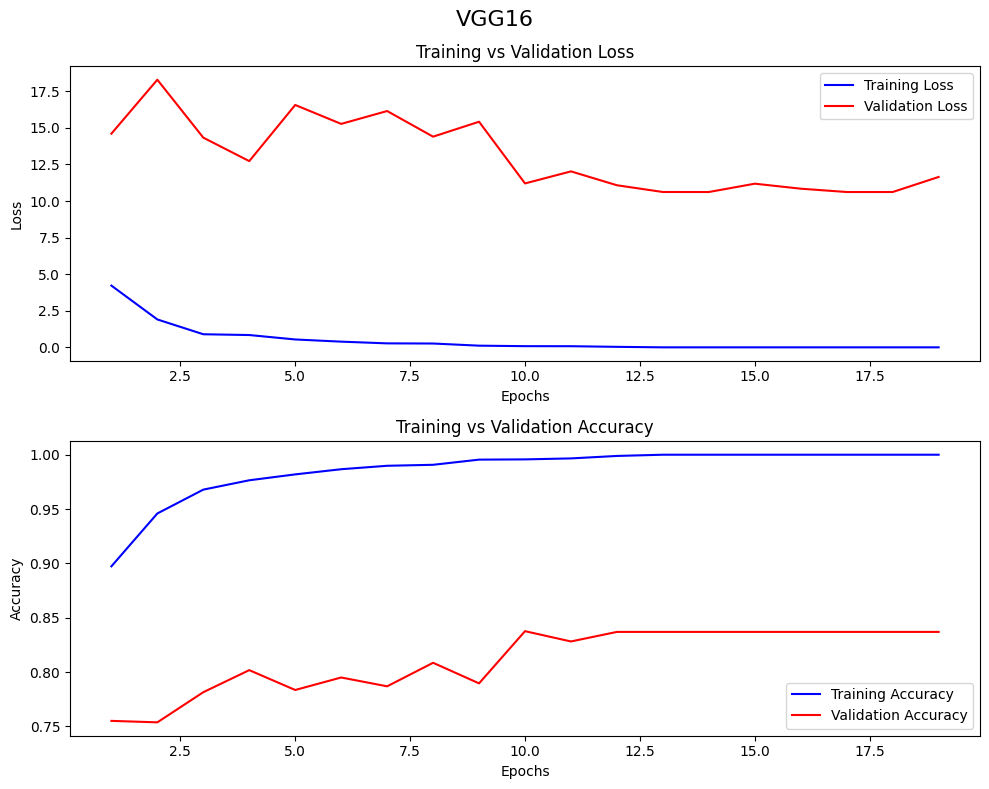

In [5]:
make_graphs(VGG16_hist, "VGG16")

In [6]:
# Xception Model
Xception_base = keras.applications.Xception(
    weights="imagenet",
    include_top=False)
Xception_base.trainable = False

inputs = keras.Input(shape=(255, 255, 3))
x = inputs
x = keras.applications.xception.preprocess_input(x)
x = Xception_base(x)
x = layers.Flatten()(x)
outputs = layers.Dense(37, activation="softmax")(x)
Xception_Model = keras.Model(inputs, outputs)
Xception_Model.compile(
    loss="categorical_crossentropy",
    optimizer="rmsprop",
    metrics=["accuracy"])

Xception_hist = Xception_Model.fit(train_dataset, epochs=20, validation_data= val_data)

83683744/83683744 ━━━━━━━━━━━━━━━━━━━━ 15s 0us/step
Epoch 1/20


I0000 00:00:1717347797.337364    2231 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_3868', 544 bytes spill stores, 544 bytes spill loads



138/139 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.6533 - loss: 7.2126

I0000 00:00:1717347812.927451    2260 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_3868', 512 bytes spill stores, 512 bytes spill loads



139/139 ━━━━━━━━━━━━━━━━━━━━ 28s 131ms/step - accuracy: 0.6550 - loss: 7.1706 - val_accuracy: 0.8200 - val_loss: 4.4143
Epoch 2/20
139/139 ━━━━━━━━━━━━━━━━━━━━ 10s 71ms/step - accuracy: 0.9065 - loss: 1.4905 - val_accuracy: 0.8518 - val_loss: 3.8758
Epoch 3/20
139/139 ━━━━━━━━━━━━━━━━━━━━ 10s 70ms/step - accuracy: 0.9527 - loss: 0.7015 - val_accuracy: 0.8593 - val_loss: 3.0110
Epoch 4/20
139/139 ━━━━━━━━━━━━━━━━━━━━ 10s 69ms/step - accuracy: 0.9591 - loss: 0.4567 - val_accuracy: 0.8823 - val_loss: 2.9342
Epoch 5/20
139/139 ━━━━━━━━━━━━━━━━━━━━ 10s 69ms/step - accuracy: 0.9757 - loss: 0.2592 - val_accuracy: 0.9005 - val_loss: 2.9282
Epoch 6/20
139/139 ━━━━━━━━━━━━━━━━━━━━ 10s 70ms/step - accuracy: 0.9843 - loss: 0.2404 - val_accuracy: 0.8958 - val_loss: 2.4670
Epoch 7/20
139/139 ━━━━━━━━━━━━━━━━━━━━ 10s 70ms/step - accuracy: 0.9847 - loss: 0.1504 - val_accuracy: 0.9053 - val_loss: 2.5761
Epoch 8/20
139/139 ━━━━━━━━━━━━━━━━━━━━ 10s 71ms/step - accuracy: 0.9901 - loss: 0.1062 - val_accura

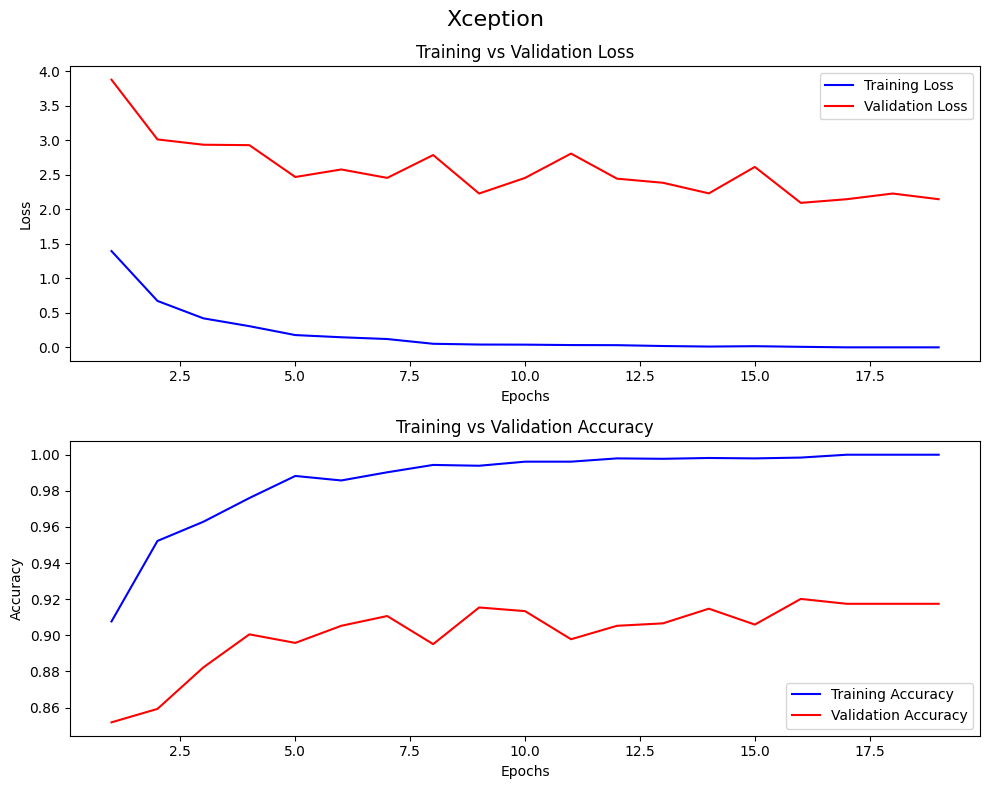

In [7]:
make_graphs(Xception_hist, "Xception")

In [8]:
# ResNet50 Model
ResNet50_base = keras.applications.ResNet50(
    weights="imagenet",
    include_top=False)
ResNet50_base.trainable = False

inputs = keras.Input(shape=(255, 255, 3))
x = inputs
x = keras.applications.resnet50.preprocess_input(x)
x = ResNet50_base(x)
x = layers.Flatten()(x)
outputs = layers.Dense(37, activation="softmax")(x)
ResNet50_Model = keras.Model(inputs, outputs)
ResNet50_Model.compile(
    loss="categorical_crossentropy",
    optimizer="rmsprop",
    metrics=["accuracy"])

ResNet50_hist = ResNet50_Model.fit(train_dataset, epochs=20, validation_data=val_data)

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 17s 0us/step
Epoch 1/20
139/139 ━━━━━━━━━━━━━━━━━━━━ 21s 101ms/step - accuracy: 0.5046 - loss: 21.6992 - val_accuracy: 0.7700 - val_loss: 6.4558
Epoch 2/20
139/139 ━━━━━━━━━━━━━━━━━━━━ 9s 63ms/step - accuracy: 0.9363 - loss: 1.4421 - val_accuracy: 0.8173 - val_loss: 5.4274
Epoch 3/20
139/139 ━━━━━━━━━━━━━━━━━━━━ 9s 63ms/step - accuracy: 0.9693 - loss: 0.5495 - val_accuracy: 0.8539 - val_loss: 5.1284
Epoch 4/20
139/139 ━━━━━━━━━━━━━━━━━━━━ 9s 65ms/step - accuracy: 0.9771 - loss: 0.4517 - val_accuracy: 0.8342 - val_loss: 6.3678
Epoch 5/20
139/139 ━━━━━━━━━━━━━━━━━━━━ 9s 63ms/step - accuracy: 0.9912 - loss: 0.1482 - val_accuracy: 0.8816 - val_loss: 4.1001
Epoch 6/20
139/139 ━━━━━━━━━━━━━━━━━━━━ 9s 68ms/step - accuracy: 0.9941 - loss: 0.0792 - val_accuracy: 0.8674 - val_loss: 5.5093
Epoch 7/20
139/139 ━━━━━━━━━━━━━━━━━━━━ 9s 62ms/step - accuracy: 0.9966 - loss: 0.0498 - val_accuracy: 0.8769 - val_loss: 4.1361
Epoch 8/20
139/139 ━━━━━━━━━━━━━━━━━━━━ 9s

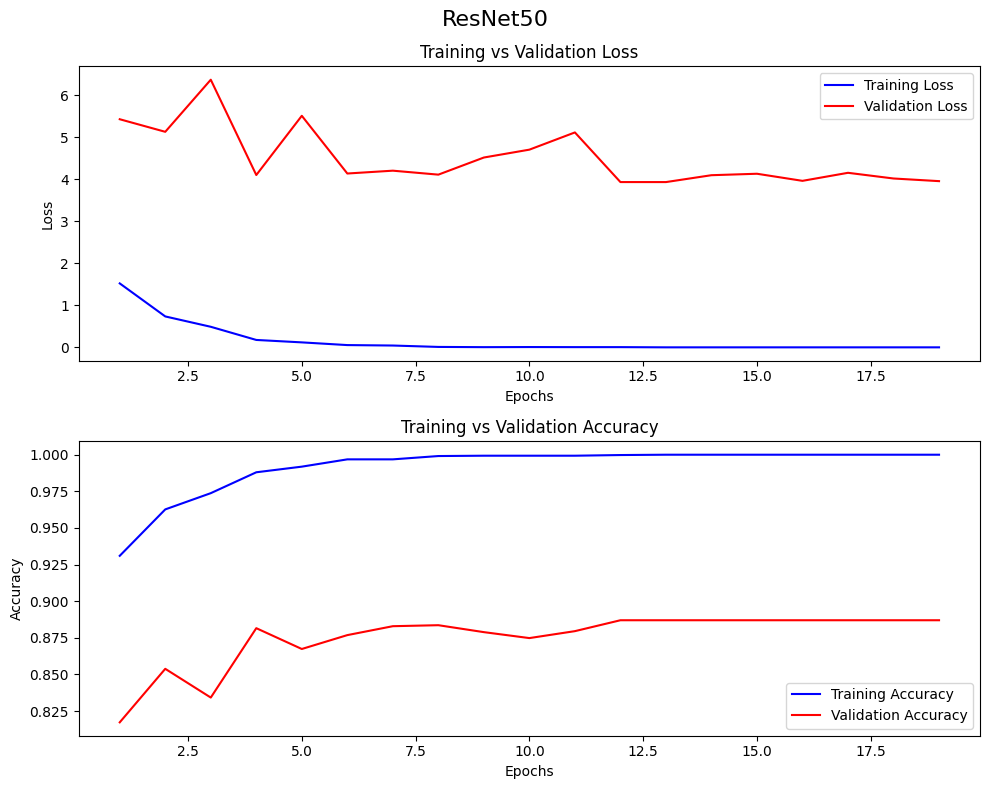

In [9]:
make_graphs(ResNet50_hist, "ResNet50")

In [10]:
# EfficientNetB5 Model
EfficientNetB5_base = keras.applications.EfficientNetB5(
    weights="imagenet",
    include_top=False)
EfficientNetB5_base.trainable = False
inputs = keras.Input(shape=(255, 255, 3))

x = inputs
x = keras.applications.efficientnet.preprocess_input(x)
x = EfficientNetB5_base(x)
x = layers.Flatten()(x)
outputs = layers.Dense(37, activation="softmax")(x)
EfficientNetB5_Model = keras.Model(inputs, outputs)
EfficientNetB5_Model.compile(
    loss="categorical_crossentropy",
    optimizer="rmsprop",
    metrics=["accuracy"])

EfficientNetB5_hist = EfficientNetB5_Model.fit(train_dataset, epochs=20, validation_data=val_data)

115263384/115263384 ━━━━━━━━━━━━━━━━━━━━ 19s 0us/step
Epoch 1/20


I0000 00:00:1717349386.927680    4333 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_28634', 544 bytes spill stores, 544 bytes spill loads



138/139 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - accuracy: 0.6238 - loss: 7.1928

I0000 00:00:1717349443.306849    4392 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_28634', 512 bytes spill stores, 512 bytes spill loads



139/139 ━━━━━━━━━━━━━━━━━━━━ 123s 537ms/step - accuracy: 0.6254 - loss: 7.1545 - val_accuracy: 0.8376 - val_loss: 2.8921
Epoch 2/20
139/139 ━━━━━━━━━━━━━━━━━━━━ 13s 95ms/step - accuracy: 0.9017 - loss: 1.6857 - val_accuracy: 0.8633 - val_loss: 3.0704
Epoch 3/20
139/139 ━━━━━━━━━━━━━━━━━━━━ 13s 95ms/step - accuracy: 0.9448 - loss: 0.9469 - val_accuracy: 0.8613 - val_loss: 3.3406
Epoch 4/20
139/139 ━━━━━━━━━━━━━━━━━━━━ 13s 95ms/step - accuracy: 0.9474 - loss: 0.8753 - val_accuracy: 0.8471 - val_loss: 4.3516
Epoch 5/20
139/139 ━━━━━━━━━━━━━━━━━━━━ 13s 95ms/step - accuracy: 0.9642 - loss: 0.5549 - val_accuracy: 0.8897 - val_loss: 2.9010
Epoch 6/20
139/139 ━━━━━━━━━━━━━━━━━━━━ 13s 95ms/step - accuracy: 0.9776 - loss: 0.3359 - val_accuracy: 0.8552 - val_loss: 4.6824
Epoch 7/20
139/139 ━━━━━━━━━━━━━━━━━━━━ 13s 95ms/step - accuracy: 0.9816 - loss: 0.2737 - val_accuracy: 0.8755 - val_loss: 3.5780
Epoch 8/20
139/139 ━━━━━━━━━━━━━━━━━━━━ 13s 95ms/step - accuracy: 0.9845 - loss: 0.2135 - val_accur

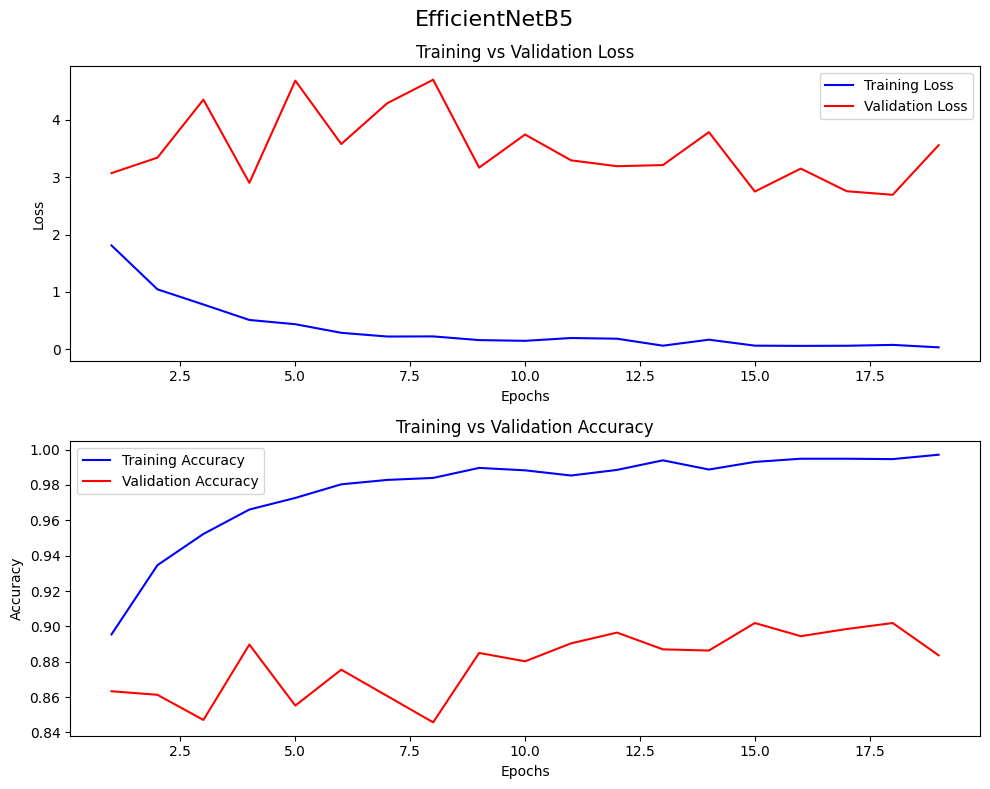

In [11]:
make_graphs(EfficientNetB5_hist, "EfficientNetB5")

In [7]:
# Run a bunch of models for Efficent Net, Xception
# Set callback to stop bad models early
callback= keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=4)

# EfficientNetB5
# download
EfficientNetB5_base = keras.applications.EfficientNetB5(
weights="imagenet",
include_top=False)
EfficientNetB5_base.trainable = False
def make_n_fit_EfficentNet(n, d, opt, n_epochs=10):
    EfficientNetB5_base = keras.applications.EfficientNetB5(
    weights="imagenet",
    include_top=False)
    EfficientNetB5_base.trainable = False
    # Define input
    inputs = keras.Input(shape=(255, 255, 3))
    # Begin to layer model
    x = inputs
    x = keras.applications.efficientnet.preprocess_input(x)
    x = EfficientNetB5_base(x)
    x = layers.Flatten()(x)
    x = layers.Dense(n)(x) # custom number of neuorns
    x = layers.Dropout(d)(x) # Adjust Dropout layer
    outputs = layers.Dense(37, activation="softmax")(x)
    # Set model and complie
    EfficientNetB5_Model = keras.Model(inputs, outputs)
    EfficientNetB5_Model.compile(
        loss="binary_crossentropy",
        optimizer=opt, # Set optimizer to be input
        metrics=["accuracy"])
    # Fit model and return history
    hist = EfficientNetB5_Model.fit(train_dataset, epochs=n_epochs, validation_data=val_data, callbacks = [callback], verbose=0)
    return hist

# Xception 
# download
Xception_base = keras.applications.Xception(
weights="imagenet",
include_top=False)
Xception_base.trainable = False
def make_n_fit_Xcept(n, d, opt, n_epochs=10):
    Xception_base = keras.applications.Xception(
    weights="imagenet",
    include_top=False)
    Xception_base.trainable = False
    # Setup inputs
    inputs = keras.Input(shape=(255, 255, 3))
    # begin layering
    x = inputs
    x = keras.applications.xception.preprocess_input(x)
    x = Xception_base(x)
    x = layers.Flatten()(x)
    x = layers.Dense(n)(x)
    x = layers.Dropout(d)(x)
    outputs = layers.Dense(37, activation="softmax")(x)
    Xception_Model = keras.Model(inputs, outputs)
    Xception_Model.compile(
        loss="binary_crossentropy",
        optimizer=opt,
        metrics=["accuracy"])

    hist = Xception_Model.fit(train_dataset, epochs=n_epochs, validation_data= val_data, callbacks = [callback], verbose=0)
    return hist

115263384/115263384 ━━━━━━━━━━━━━━━━━━━━ 21s 0us/step
83683744/83683744 ━━━━━━━━━━━━━━━━━━━━ 15s 0us/step


EfficientNetB5:

In [21]:
# run once before doing any batches. will overwrite current work.
#running_eff_hists_list = []
#hist_id = 0
# now that running_eff_hists_list exists, load it from the json (below)

In [9]:
# What we loop through
# optimizers = ["rmsprop", "adam"]
optimizers = ["adam"]
# total_neurons = [16, 32, 64, 128]
total_neurons = [128]
drops = [0, .25, .5]

eff_hists_list = []

# Now loop and make graphs
for opt in optimizers:
    for neuron in total_neurons:
        for dropout in drops:
            # make n fit
            id = f"{hist_id}, EfficentNet(n={neuron}, d={dropout}, opt={opt})"
            print(id)
            eff_hist = make_n_fit_EfficentNet(neuron, dropout, opt)
            eff_hists_list.append((id, eff_hist))
            hist_id += 1
print("Done.")

22, EfficentNet(n=128, d=0, opt=adam)


I0000 00:00:1717203400.481454     153 service.cc:145] XLA service 0x7f5f2c003810 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1717203400.481491     153 service.cc:153]   StreamExecutor device (0): NVIDIA GeForce RTX 3070 Ti, Compute Capability 8.6
2024-06-01 00:56:40.999326: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-06-01 00:56:42.794185: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:465] Loaded cuDNN version 8906
I0000 00:00:1717203442.451246     153 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


23, EfficentNet(n=128, d=0.25, opt=adam)


I0000 00:00:1717203664.683271    1004 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_29225', 4 bytes spill stores, 4 bytes spill loads



24, EfficentNet(n=128, d=0.5, opt=adam)
Done.


In [10]:
# work in batches
for list in eff_hists_list:
    running_eff_hists_list.append(list)
print(len(running_eff_hists_list))

25


In [11]:
# Serialize the histories dictionary to JSON
serialized_histories = {}

for description, history in running_eff_hists_list:
    history_dict = {
        'description': description,
        'train_loss': history.history.get('loss', []),
        'val_loss': history.history.get('val_loss', []),
        'train_accuracy': history.history.get('accuracy', []),
        'val_accuracy': history.history.get('val_accuracy', [])
    }
    serialized_histories[description] = history_dict

with open('running_eff_hists_list.json', 'w') as json_file:
    json.dump(serialized_histories, json_file, indent=4)

print("Data successfully written to running_eff_hists_list.json")

Data successfully written to running_eff_hists_list.json


In [23]:
# Read the serialized histories from the JSON file
with open('running_eff_hists_list.json', 'r') as json_file:
    serialized_histories = json.load(json_file)

In [24]:
# Rebuild running_eff_hists_list (and eventually running_xcept_hists_list) by mimicing history object
class SimplifiedHistory:
    def __init__(self, history_data):
        self.history = history_data

def rebuild_running_hists_list(json_filename):
    with open(json_filename, 'r') as json_file:
        serialized_histories = json.load(json_file)
    
    running_hists_list = []
    for description, history_data in serialized_histories.items():
        simplified_history = SimplifiedHistory({
            'train_loss': history_data.get('train_loss', []),
            'val_loss': history_data.get('val_loss', []),
            'train_accuracy': history_data.get('train_accuracy', []),
            'val_accuracy': history_data.get('val_accuracy', [])
        })
        running_hists_list.append((description, simplified_history))
    
    return running_hists_list

running_eff_hists_list = rebuild_running_hists_list('running_eff_hists_list.json')
hist_id = len(running_eff_hists_list)

# Print the first history's val_accuracy to verify
first_description, first_history = running_eff_hists_list[0]
print(f"Description: {first_description}")
print(f"Validation Accuracy: {first_history.history['val_accuracy']}")

Description: 0, EfficentNet(n=16, d=0, opt=rmsprop)
Validation Accuracy: [0.5568335652351379, 0.6813260912895203, 0.7395128607749939, 0.8396481871604919, 0.8876860737800598, 0.8728010654449463, 0.8619756698608398, 0.882949948310852, 0.8761840462684631]


In [29]:
best_validation_accuracy = 0
best_index = -1

for id, hist in serialized_histories.items():
    validation_accuracy = hist['val_accuracy']
    max_val_acc = max(validation_accuracy)
    if max_val_acc > best_validation_accuracy:
        best_validation_accuracy = max_val_acc
        best_hist = hist
        best_id = id

print(f"Best EfficientNetB5 Validation Accuracy: {best_validation_accuracy} = {best_id}")

Best EfficientNetB5 Validation Accuracy: 0.9066305756568909 = 4, EfficentNet(n=32, d=0, opt=rmsprop)


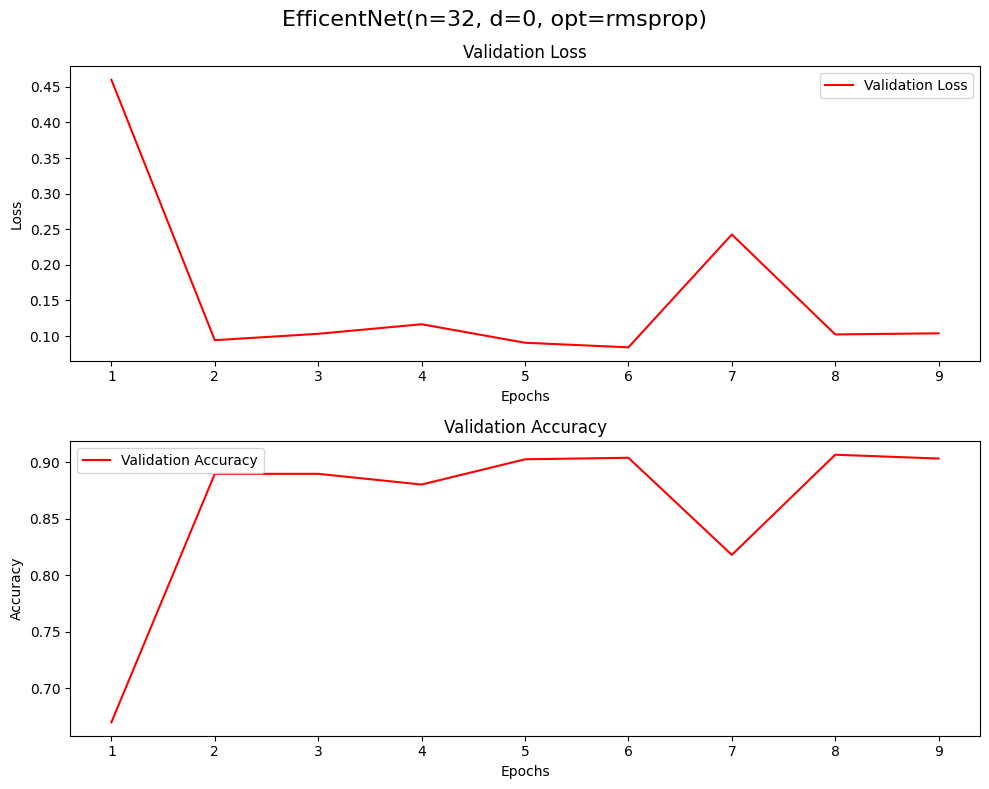

In [42]:
# missing training metrics, plot only validation

def make_graphs(obj, title):
    epochs = len(obj.history['val_loss'])
    fig, axes = plt.subplots(2, 1, figsize=(10, 8))
    fig.suptitle(title, fontsize=16)  # Title for the whole figure
    make_graphs_loss(obj, epochs, axes[0])
    make_graphs_accuracy(obj, epochs, axes[1])
    plt.tight_layout()

def make_graphs_loss(obj, epochs, ax):
    # makes graph from object and epochs
    eps = [i for i in range(epochs)]
    val_acc = obj.history['val_loss']
    # Now make plot
    sns.lineplot(x=eps[1:], y=val_acc[1:], color='r', label='Validation Loss', ax=ax)
    ax.set_xlabel('Epochs')
    ax.set_ylabel('Loss')
    ax.set_title('Validation Loss')
    ax.legend()

def make_graphs_accuracy(obj, epochs, ax):
    # makes graph from object and epochs
    eps = [i for i in range(epochs)]
    val_acc = obj.history['val_accuracy']
    # Now make plot
    sns.lineplot(x=eps[1:], y=val_acc[1:], color='r', label='Validation Accuracy', ax=ax)
    ax.set_xlabel('Epochs')
    ax.set_ylabel('Accuracy')
    ax.set_title('Validation Accuracy')
    ax.legend()

simplified_best_hist = SimplifiedHistory({
    'val_loss': best_hist['val_loss'],
    'val_accuracy': best_hist['val_accuracy']
})
make_graphs(simplified_best_hist, best_id[3:])

Xception:

In [43]:
# run once before doing any batches. will overwrite current work.
# run after finshing EfficentNet
running_xcept_hists_list = []
hist_id = 0
# fix not storing training data. simplehist mimic function.

In [17]:
# What we loop through.
# optimizers = ["rmsprop", "adam"]
optimizers = ["rmsprop"]
# total_neurons = [16, 32, 64, 128]
total_neurons = [128]
drops = [0, .25, .5]

xcept_hists_list = []

# Now loop and make graphs
for opt in optimizers:
    for neuron in total_neurons:
        for dropout in drops:
            # make n fit
            id = f"{hist_id}, Xcept(n={neuron}, d={dropout}, opt={opt})"
            print(id)
            xcept_hist = make_n_fit_Xcept(neuron, dropout, opt)
            xcept_hists_list.append((id, xcept_hist))
            hist_id += 1
print("Done.")

21, Xcept(n=128, d=0, opt=rmsprop)
22, Xcept(n=128, d=0.25, opt=rmsprop)


I0000 00:00:1717210863.040695    3528 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_5041', 4 bytes spill stores, 4 bytes spill loads



23, Xcept(n=128, d=0.5, opt=rmsprop)
Done.


In [18]:
# work in batches
for list in xcept_hists_list:
    running_xcept_hists_list.append(list)
print(len(running_xcept_hists_list))

24


In [19]:
# Serialize the histories dictionary to JSON
serialized_histories = {}

for description, history in running_xcept_hists_list:
    history_dict = {
        'description': description,
        'loss': history.history.get('loss', []),
        'val_loss': history.history.get('val_loss', []),
        'accuracy': history.history.get('accuracy', []),
        'val_accuracy': history.history.get('val_accuracy', [])
    }
    serialized_histories[description] = history_dict

with open('running_xcept_hists_list.json', 'w') as json_file:
    json.dump(serialized_histories, json_file, indent=4)

print("Data successfully written to running_xcept_hists_list.json")

Data successfully written to running_xcept_hists_list.json


In [20]:
# Read the serialized histories from the JSON file
with open('running_xcept_hists_list.json', 'r') as json_file:
    serialized_histories = json.load(json_file)

In [21]:
# Rebuild running_xcept_hists_list by mimicing history object
class SimplifiedHistory:
    def __init__(self, history_data):
        self.history = history_data

def rebuild_running_hists_list(json_filename):
    with open(json_filename, 'r') as json_file:
        serialized_histories = json.load(json_file)
    
    running_hists_list = []
    for description, history_data in serialized_histories.items():
        simplified_history = SimplifiedHistory({
            'loss': history_data.get('loss', []),
            'val_loss': history_data.get('val_loss', []),
            'accuracy': history_data.get('accuracy', []),
            'val_accuracy': history_data.get('val_accuracy', [])
        })
        running_hists_list.append((description, simplified_history))
    
    return running_hists_list

running_xcept_hists_list = rebuild_running_hists_list('running_xcept_hists_list.json')
hist_id = len(running_xcept_hists_list)

# Print the first history's accuracy to verify
first_description, first_history = running_xcept_hists_list[0]
print(f"Description: {first_description}")
print(f"Training Accuracy: {first_history.history['accuracy']}")

Description: 3, Xcept(n=64, d=0, opt=adam)
Training Accuracy: [0.7472850680351257, 0.9233031868934631, 0.9588235020637512, 0.9746606349945068]


Best Xception Validation Accuracy: 0.918809175491333 = 5, Xcept(n=128, d=0.5, opt=adam)


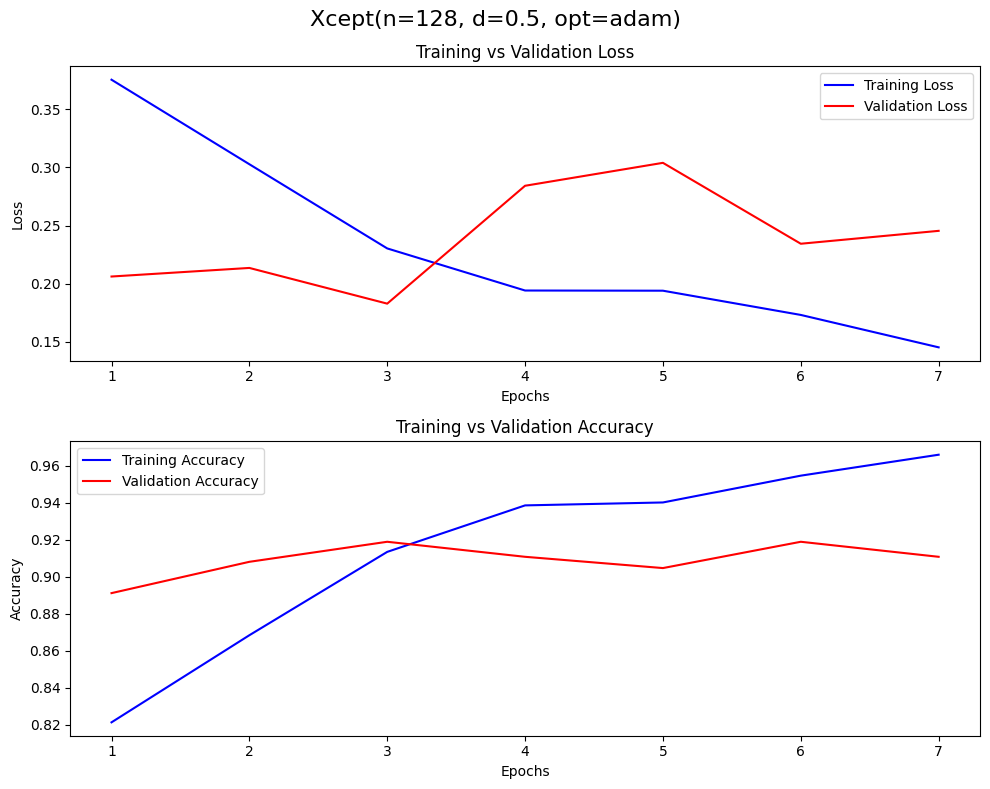

In [23]:
best_validation_accuracy = 0
best_index = -1

for id, hist in serialized_histories.items():
    validation_accuracy = hist['val_accuracy']
    max_val_acc = max(validation_accuracy)
    if max_val_acc > best_validation_accuracy:
        best_validation_accuracy = max_val_acc
        best_hist = hist
        best_id = id
        
print(f"Best Xception Validation Accuracy: {best_validation_accuracy} = {best_id}")

simplified_best_hist = SimplifiedHistory({
    'loss': best_hist['loss'],
    'accuracy': best_hist['accuracy'],
    'val_loss': best_hist['val_loss'],
    'val_accuracy': best_hist['val_accuracy']
})
make_graphs(simplified_best_hist, best_id[3:])